<header>
   <p  style='font-size:36px;font-family:Arial; color:#F0F0F0; background-color: #00233c; padding-left: 20pt; padding-top: 20pt;padding-bottom: 10pt; padding-right: 20pt;'>
       Austin Bike Share
  <br>
       <img id="teradata-logo" src="https://storage.googleapis.com/clearscape_analytics_demo_data/DEMO_Logo/teradata.svg" alt="Teradata" style="width: 125px; height: auto; margin-top: 20pt;">
    </p>
</header>

<p style = 'font-size:20px;font-family:Arial;color:#00233C'><b>Introduction:</b></p>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Bike shares are becoming a popular alternative means of transportation. Suppose you had a transportation business servicing the public with various stations where they could access your transportation services. You must ensure you have equipment at the stations when the public needs them. You also know that the weather dramatically impacts the demand for your transportation services. This demonstration shows how to integrate historical trip information with weather information, leveraging Vantage Geospatial and time-series capabilities to improve your service and grow your business.
<br>
The City of Austin makes data available on >649k bike trips over 2013-2017.</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Contents:</b></p>
<ol style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>Connect to Vantage</li>
    <li>Explore the data</li>
    <li>Create and Explore Temporal, Geospatial and Time index data</li>
    <li>Insights</li>
    <li>Clean up</li>

<hr style='height:2px;border:none;background-color:#00233C;'>
<b style = 'font-size:28px;font-family:Arial;color:#00233C'>1. Connect to Vantage</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>You will be prompted to provide the password. Enter your password, press the Enter key, and then use the down arrow to go to the next cell.</p>

In [1]:
%connect local, hidewarnings=True

Password: ········


Success: 'local' connection established and activated for user 'demo_user', with default database 'demo_user'


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Setup for execution of notebook. Begin running steps with Shift + Enter keys.</p>

In [2]:
SET query_band='DEMO=AustinBikeShare.ipynb;' update for session;

Success: 1 rows affected

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>1.1 Getting Data for This Demo</b></p>    
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We have provided data for this demo on cloud storage. You can either run the demo using foreign tables to access the data without any storage on your environment or download the data to local storage, which may yield faster execution. Still, there could be considerations of available storage. Two statements are in the following cell, and one of them is commented out. You may switch between the modes by changing the comment string.</p>

In [3]:
-- call get_data('DEMO_AustinBikeShare_cloud');           -- Takes 20 seconds
call get_data('DEMO_AustinBikeShare_local');           -- Takes 50 seconds

Success: 0 rows affected

Success: 0 rows affected

,Message
1,That ran for 0:00:49.85 with 20 statements and 0 errors.


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Optional step – if you want to see status of databases/tables created and space used.</p>

In [4]:
call space_report();

Success: 0 rows affected

,Space_Report
1,"You have: #databases=2 #tables=3 #views=3 You have used 63.6 MB of 30,677.9 MB available - 0.2% ... Space Usage OK"
2,
3,Database Name #tables #views Avail MB Used MB
4,"demo_user 0 0 30,481.9 MB 0.8 MB"
5,DEMO_AustinBikeShare 0 3 0.0 MB 0.0 MB
6,DEMO_AustinBikeShare_db 3 0 195.9 MB 62.9 MB


<hr style='height: 2px;border:none;background-color:#00233C;'>
<b style = 'font-size:28px;font-family:Arial;color:#00233C'>2. Explore the data</b>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>As a warm-up, let us look at the tables in our database TRNG_AustinBike.</p>       

In [5]:
SELECT 
    DatabaseName,
    TableName
FROM
    DBC.Tables
WHERE
    DatabaseName = 'DEMO_AustinBikeShare'

,DatabaseName,TableName
1,DEMO_AustinBikeShare,trips
2,DEMO_AustinBikeShare,stations
3,DEMO_AustinBikeShare,Weather


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We can see that we have three tables in our database. The Trips table contains data on the trips taken using the bikes, the stations table has locations of the bike stations, and the weather table has details about the weather.
    <br>
    <br>
The query below shows the number of rows in each of the tables in the database.</p>

In [6]:
SELECT
(
    SELECT COUNT(*)
    FROM DEMO_AustinBikeShare.trips
) AS trips,
(
    SELECT COUNT(*)
    FROM DEMO_AustinBikeShare.stations
) AS stations,
(
    SELECT COUNT(*)
    FROM DEMO_AustinBikeShare.weather
) AS weather;

,trips,stations,weather
1,649231,72,24592


<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>2.1 Examine the trips table</b></p>    
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let's look at the sample data in the trips table.</p>

In [7]:
SELECT
    *
FROM
    DEMO_AustinBikeShare.trips
SAMPLE 10;

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,MONTH_NUM,start_station_id,start_station_name,start_time,subscriber_type,trip_id,YEAR_NUM
1,399,1:12:29,15,2497,Capitol Station / Congress & 11th,11,2497,Capitol Station / Congress & 11th,2015-11-14 20:12:29.000000,Walk Up,9900329060,2015
2,232,21:12:00,49,2496,8th & Congress,10,2536,Waller & 6th St.,2014-10-26 17:12:00.000000,24-Hour Kiosk (Austin B-cycle),9900286234,2014
3,575,16:45:21,61,2574,Zilker Park,11,2575,Riverside @ S. Lamar,2016-11-21 11:45:21.000000,Walk Up,12920099,2016
4,563,14:46:22,26,2497,Capitol Station / Congress & 11th,2,2570,South Congress & Academy,2016-02-21 09:46:22.000000,Walk Up,8837475,2016
5,870,18:47:29,3,2549,Long Center @ South 1st & Riverside,5,2550,Republic Square @ Guadalupe & 4th St.,2016-05-11 14:47:29.000000,Founding Member,9953046,2016
6,208,15:12:28,6,2575,Riverside @ S. Lamar,9,2537,West & 6th St.,2015-09-10 11:12:28.000000,Local30,9900255727,2015
7,610,17:08:14,12,2565,Trinity & 6th Street,2,2497,Capitol Station / Congress & 11th,2016-02-13 12:08:14.000000,Walk Up,8753472,2016
8,984,1:00:50,16,3687,Boardwalk West,,2563,Davis at Rainey Street,2017-07-02 21:00:50.000000,Walk Up,15289214,
9,287,16:12:57,41,2539,Convention Center / 3rd & Trinity,1,2707,Rainey St @ Cummings,2016-01-08 11:12:57.000000,Walk Up,9900013294,2016
10,16,18:12:00,43,2502,Barton Springs & Riverside,8,2571,Red River & 8th Street,2015-08-10 14:12:00.000000,Walk Up,9900229543,2015


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Which type of subscribers take most of the rides?</p> 

In [8]:
select top 10 count(trip_id) as ride_count, subscriber_type from DEMO_AustinBikeShare.trips group by subscriber_type order by 1 desc;

,ride_count,subscriber_type
1,282170,Walk Up
2,126517,Local365
3,108672,24-Hour Kiosk (Austin B-cycle)
4,37061,Local30
5,30306,Annual Membership (Austin B-cycle)
6,24614,Weekender
7,8246,Explorer
8,4005,Local365 ($80 plus tax)
9,3550,Founding Member
10,3137,7-Day


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>From the above result we can say that <b>Walk Up</b> rides are <b>250%</b> more than second most popular subscription type.
    <br><br>
    From which station do highest number of trips start?</p>  

In [9]:
SELECT
    TOP 20
    start_station_name,
    COUNT(trip_id) AS trips
FROM
    DEMO_AustinBikeShare.trips
GROUP BY 1
ORDER BY 2 DESC;

,start_station_name,trips
1,Riverside @ S. Lamar,28695
2,City Hall / Lavaca & 2nd,28535
3,5th & Bowie,26669
4,2nd & Congress,26612
5,4th & Congress,24972
6,Convention Center / 4th St. @ MetroRail,24357
7,Rainey St @ Cummings,23468
8,Davis at Rainey Street,22273
9,Capitol Station / Congress & 11th,20056
10,Pfluger Bridge @ W 2nd Street,19434


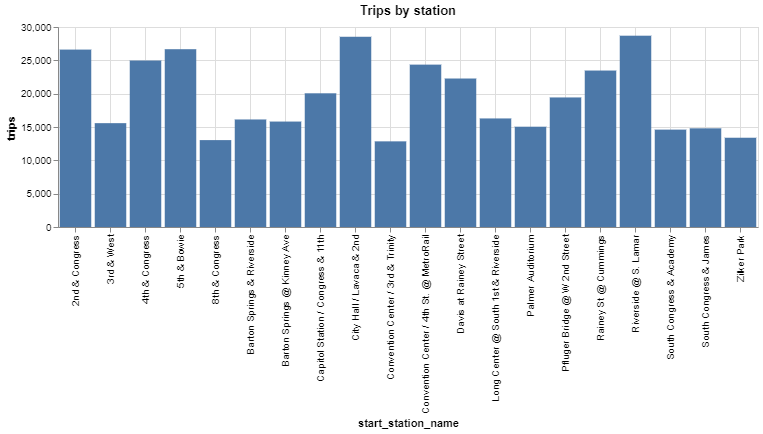

In [10]:
%chart start_station_name, trips, title = "Trips by station", height = 200, width = 700

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We see that <b>Riverside @ S. Lamar</b> has the highest number of trips originating from here.</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Let's see average number of trips originating per from a station.</p>

In [11]:
SELECT AVG(trips) FROM (
    SELECT
    start_station_name,
    COUNT(1) AS trips
    FROM
        DEMO_AustinBikeShare.trips
    GROUP BY 1
) AS t;

,TRIPS
1,7213.677777777778


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We see that the top station <b>Riverside @ S. Lamar</b> has <b>4 times more trips</b> than the average.</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Now let's look at the pattern of bike usage over time. </p>    

In [12]:
SELECT
    TRUNC(start_time, 'Month') AS start_Month,
    COUNT(1) AS trips
FROM
    DEMO_AustinBikeShare.trips
GROUP BY 1
ORDER BY 1;

,start_Month,trips
1,2013-12-01,1469
2,2014-01-01,3373
3,2014-02-01,5519
4,2014-03-01,25769
5,2014-04-01,14465
6,2014-05-01,15078
7,2014-06-01,13620
8,2014-07-01,14351
9,2014-08-01,11146
10,2014-09-01,11539


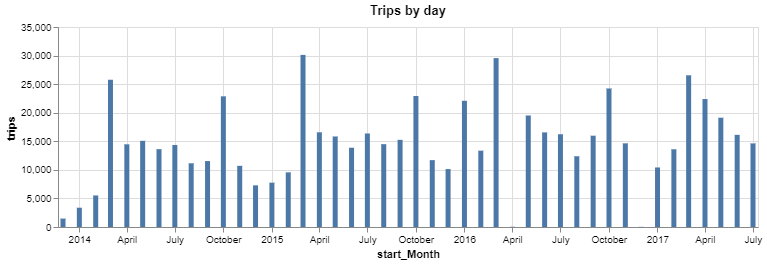

In [13]:
%chart start_Month, trips, title = "Trips by day", typex = t, width = 700

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>In the above chart we observe few things:</p>
<ol style = 'font-size:16px;font-family:Arial;color:#00233C'>
    <li>There are two months where the data is nearly missing</li>
    <li>The peak usage month is as much as 30k trips in a month</li>
    <li>March and October are first and second busiest months across the data of 4 years.</li>
</ol>

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Can this be related to the weather? Is the weather in March and October favorable for biking? Let's see this in the next section.</p>

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>2.2 Examine the weather table</b></p>    

In [14]:
SELECT * FROM DEMO_AustinBikeShare.weather SAMPLE 10;

,dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds,weather_id,weather_main,weather_desc,weather_icon
1,2014-01-15 15:00:00.000000,288.17,287.04,289.26,1024,70,1,270,,0,0,800,Clear,Sky is Clear,01d
2,2017-02-11 12:00:00.000000,295.29,293.15,297.15,1018,78,5,210,,,75,701,Mist,mist,50d
3,2015-10-08 10:00:00.000000,295.52,293.71,297.04,1018,78,2,58,,,40,721,Haze,haze,50d
4,2017-09-19 08:00:00.000000,297.7,296.15,299.15,1015,83,2,0,,,90,701,Mist,mist,50n
5,2017-05-26 21:00:00.000000,303.88,302.15,305.15,1009,55,5,170,,,40,802,Clouds,scattered clouds,03n
6,2017-06-15 18:00:00.000000,308.71,307.15,310.15,1013,35,3,170,,,1,800,Clear,sky is clear,01d
7,2017-02-17 16:00:00.000000,297.142,297.142,297.142,998,47,6,209,,,0,800,Clear,Sky is Clear,01d
8,2016-01-30 11:00:00.000000,286.5,284.15,290.15,1014,66,6,210,,,1,800,Clear,sky is clear,01d
9,2017-02-09 17:00:00.000000,292.39,291.15,294.15,1025,24,2,0,,,1,800,Clear,sky is clear,01d
10,2016-05-02 00:00:00.000000,293.33,292.15,294.15,1016,64,6,10,,,90,804,Clouds,overcast clouds,04n


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The temperature data is reported hourly (the minutes and seconds are always zero). The temperature columns are in Kelvin, which few people use to decide if it is good bicycle weather, so we will create a view over the weather table to convert the temperature to Fahrenheit. We will also average the temperature for the day.</p>

In [15]:
REPLACE VIEW austin_weather AS
    SELECT
        TRUNC(dt, 'Month') AS dt, 
        ROUND(AVG((temp - 273.15) * 9/5 + 32) ,0) AS AveTemp,
        SUM(CASE
                WHEN weather_main in ('Rain', 'Mist') THEN 1
                ELSE 0
            END) AS Precip_hours
    FROM DEMO_AustinBikeShare.weather
    GROUP BY 1;

Success: 0 rows affected

In [16]:
SELECT * FROM austin_weather ORDER BY 1;

,dt,AveTemp,Precip_hours
1,2013-12-01,45,49
2,2014-01-01,48,131
3,2014-02-01,51,63
4,2014-03-01,57,24
5,2014-04-01,67,82
6,2014-05-01,73,207
7,2014-06-01,80,68
8,2014-07-01,82,135
9,2014-08-01,84,2
10,2015-06-01,82,29


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>If we plot the data, we find we are missing some data, but we get an idea of the typical temperature ranges.  If we look at the hours each month when precipitation occurs, we see some patterns that could also be impacting the number of trips.</p>

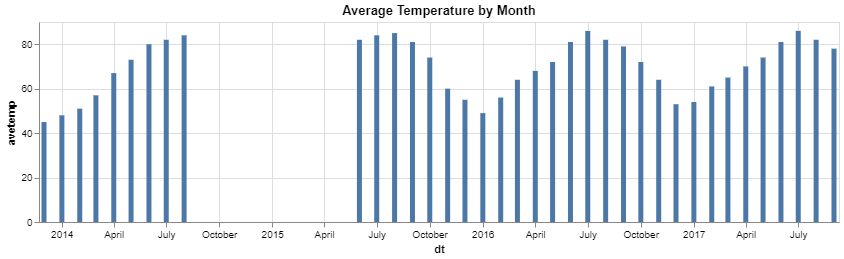

In [17]:
%chart dt, avetemp, width = 800, title = "Average Temperature by Month"

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Here we can observe that for almost all of the March and October months, the temperature is around 70 degrees Fahrenheit. This is a favorable biking temperature as it is neither too cold nor too hot.</p>

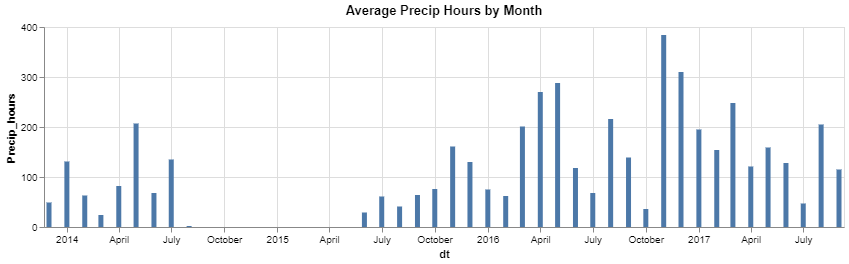

In [18]:
%chart dt, Precip_hours, width = 800, title = "Average Precip Hours by Month"

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>From the above two charts, March and October have favorable conditions for biking, which reflects in the increased bike rides.</p>

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>2.3 Geospatial data</b></p>    

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The Geospatial columns have a type and one or more pairs of Latitude and Longitude. We included the Latitude and Longitude columns in the table so you could see how a simple geospatial feature (a POINT) is represented.
    <br>
For more geospatial datatypes supported by Teradata, please click <a href = 'https://docs.teradata.com/r/Enterprise_IntelliFlex_VMware/Geospatial-Data-Types/Geospatial-Data/Geometry-Types'>here</a>.</p>

In [19]:
SELECT * FROM DEMO_AustinBikeShare.stations SAMPLE 5;

,latitude,longitude,location,name,station_id,status
1,30.26968,-97.73074,POINT (-97.73074 30.26968),East 11th St. & San Marcos,2569,active
2,30.25802,-97.73910,POINT (-97.7391 30.25802),Rainey @ River St,2576,closed
3,30.26960,-97.75332,POINT (-97.75332 30.2696),5th & Bowie,2501,active
4,30.27260,-97.74127,POINT (-97.74127 30.2726),Capitol Station / Congress & 11th,2497,active
5,30.25630,-97.71007,POINT (-97.71007 30.2563),Capital Metro HQ - East 5th at Broadway,2823,active


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Numerous geospatial functions exist, but we can demonstrate the basics by finding the distance from the main office (station_id = 1001) to other stations.</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
For more geospatial functions supported by Teradata, please click <a href = 'https://docs.teradata.com/r/Enterprise_IntelliFlex_VMware/Geospatial-Data-Types'>here</a>.</p>

In [20]:
SELECT
    TOP 10 station.station_id, station.name, 
    ROUND(office.location.ST_SphericalDistance(station.location), 0) Distance_Meters
FROM DEMO_AustinBikeShare.stations station, DEMO_AustinBikeShare.stations office
WHERE office.station_id = 1001
ORDER BY 1;

,station_id,name,Distance_Meters
1,1001,OFFICE/Main/Shop/Repair,0
2,1002,6th & Navasota St.,1408
3,1003,8th & Guadalupe,551
4,1004,Red River & LBJ Library,1868
5,1005,State Parking Garage @ Brazos & 18th,846
6,1006,Zilker Park West,2797
7,1007,Lavaca & 6th,605
8,1008,Nueces @ 3rd,1057
9,2494,2nd & Congress,931
10,2495,4th & Congress,715


<hr style='height: 2px;border:none;background-color:#00233C;'>
<b style = 'font-size:28px;font-family:Arial;color:#00233C'>3. Create and Explore Temporal, Geospatial and Time index data</b>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.1 Create a temporal table with weather data</b></p>    
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Temporal tables store and maintain information concerning time. Using temporal tables, Vantage can process statements and queries that include time-based reasoning. Temporal tables have one or two special columns which store time information:
<ul style='font-size:16px;font-family:Arial;color:#00233C'>
    <li>A transaction-time column records and maintains the period Vantage was aware of the information in the row. Vantage automatically enters and maintains the transaction-time column data and consequently tracks such information's history.</li>
    <li>A valid-time column models the real-world and stores information such as the time an insurance policy or product warranty is valid, the length of employment of an employee, or other information that is important to track and manipulate in a time-aware fashion. When you add a new row to this type of table, you use the valid-time column to specify the time period for which the row information is valid. This is the period of validity (PV) of the information in the row.</li>
</ul>
</p>

In [21]:
CREATE TABLE weather_temporal (
    begin_dt      TIMESTAMP(6) NOT NULL,
    end_dt        TIMESTAMP(6) NOT NULL,
    temp          FLOAT,
    temp_min      FLOAT,
    temp_max      FLOAT,
    pressure      INTEGER,
    humidity      INTEGER,
    wind_speed    INTEGER,
    wind_deg      INTEGER,
    rain_1h       FLOAT,
    rain_3h       FLOAT,
    clouds        INTEGER,
    weather_id    INTEGER,
    weather_main  VARCHAR(50),
    weather_desc  VARCHAR(50),
    weather_icon  VARCHAR(50),
    PERIOD FOR Weather_Duration(begin_dt,end_dt) AS VALIDTIME
)
PRIMARY INDEX (weather_id);

Success: 0 rows affected

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Here, we are converting temp, temp_min, and temp_max from Kelvin to Fahrenheit while inserting the data into the weather_temporal table.</p>

In [22]:
INSERT INTO weather_temporal
SELECT
    dt,
    dt + INTERVAL '59' MINUTE + INTERVAL '59' SECOND,
    round( ((temp - 273.15) * 9/5 + 32 ) ,0),
    round( ((temp_min - 273.15) * 9/5 + 32 ) ,0),
    round( ((temp_max - 273.15) * 9/5 + 32 ) ,0),
    pressure,
    humidity,
    wind_speed,
    wind_deg,
    rain_1h,
    rain_3h,
    clouds,
    weather_id,
    weather_main,
    weather_desc,
    weather_icon
FROM 
    DEMO_AustinBikeShare.weather;

Success: 24592 rows affected

In [23]:
SEQUENCED VALIDTIME SELECT * FROM weather_temporal SAMPLE 10;

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds,weather_id,weather_main,weather_desc,weather_icon,VALIDTIME
1,64,63,66,1015,93,2,180,,,90,701,Mist,mist,50n,"2015-12-21 06:00:00.000000,2015-12-21 06:59:59.000000"
2,46,43,48,1020,61,2,290,,,20,801,Clouds,few clouds,2,"2014-03-04 15:00:00.000000,2014-03-04 15:59:59.000000"
3,70,68,73,1006,94,4,170,,,90,501,Rain,moderate rain,10d,"2015-10-30 14:00:00.000000,2015-10-30 14:59:59.000000"
4,85,79,90,1013,52,1,40,,,1,800,Clear,sky is clear,01n,"2016-09-01 20:00:00.000000,2016-09-01 20:59:59.000000"
5,60,59,61,1023,100,2,170,,,90,300,Drizzle,light intensity drizzle,09d,"2017-03-16 10:00:00.000000,2017-03-16 10:59:59.000000"
6,39,36,45,1023,69,2,191,,,1,800,Clear,sky is clear,01n,"2016-01-13 02:00:00.000000,2016-01-13 02:59:59.000000"
7,67,64,69,1011,88,1,68,,,1,800,Clear,sky is clear,01n,"2015-09-29 05:00:00.000000,2015-09-29 05:59:59.000000"
8,88,86,91,1008,33,5,190,,,1,800,Clear,sky is clear,01d,"2017-05-25 15:00:00.000000,2017-05-25 15:59:59.000000"
9,72,68,75,1012,64,2,330,,,1,800,Clear,sky is clear,01n,"2016-06-05 23:00:00.000000,2016-06-05 23:59:59.000000"
10,71,70,72,1015,83,3,190,,,75,803,Clouds,broken clouds,04n,"2016-11-18 07:00:00.000000,2016-11-18 07:59:59.000000"


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Now we can efficiently answer time-based reasoning queries faster and efficiently with Temporal tables. For example, was the weather favorable to biking in March and October 2016?</p>

In [24]:
SELECT
    COUNT(weather_main) AS weather_hours, weather_main
FROM (
    VALIDTIME PERIOD '(2016-03-01, 2016-03-31)'
    SELECT * FROM weather_temporal
) AS dt
GROUP BY weather_main;

,weather_hours,weather_main
1,196,Clear
2,62,Rain
3,130,Mist
4,12,Fog
5,14,Haze
6,12,Thunderstorm
7,17,Drizzle
8,102,Clouds


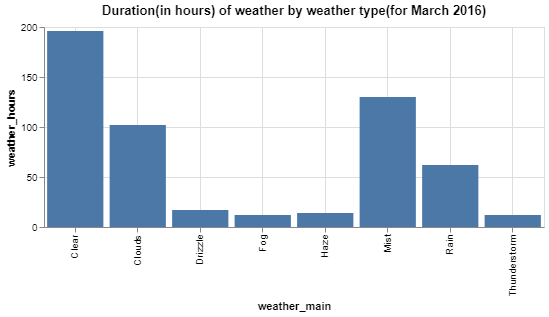

In [25]:
%chart weather_main, weather_hours, width = 500, title = "Duration(in hours) of weather by weather type(for March 2016)"

In [26]:
SELECT
    COUNT(weather_main) AS weather_hours, weather_main
FROM (
        VALIDTIME PERIOD '(2016-10-01, 2016-10-30)'
        SELECT * FROM weather_temporal
    ) AS dt
GROUP BY weather_main;

,weather_hours,weather_main
1,406,Clear
2,36,Rain
3,234,Clouds


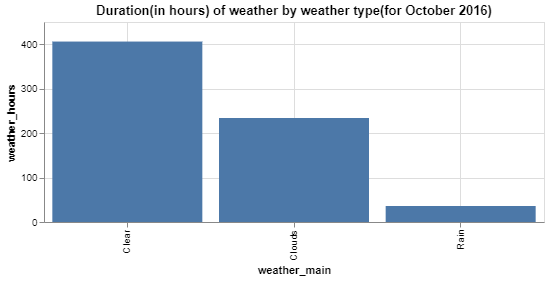

In [27]:
%chart weather_main, weather_hours, width = 500, title = "Duration(in hours) of weather by weather type(for October 2016)"

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The above graphs suggest that March and October 2016 had more days favorable for biking(clear, cloudy, mist), hence explaining the increased number of bike rides.</p>

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.2 Create a view for all trips with start/end stations data and a GEOSEQUENCE with start/end lat/long/time</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The code below defines a view which enhances the trip data with a Geosequence field containing the location and time for the start and end points of the trip.</p>

In [28]:
REPLACE VIEW trips_geo AS
SELECT
    t.bikeid,
    t.trip_ID,
    t.subscriber_type,
    t.start_station_id,
    COALESCE(t.start_station_name, st.NAME) AS start_station_name,
    t.start_time,
    st.status starting_station_status,
    t.end_station_id,
    COALESCE(t.end_station_name, ed.NAME) AS end_station_name,
    t.start_time 
        + CAST(t.duration_minutes/60 AS INTERVAL HOUR(4)) 
        + CAST(t.duration_minutes MOD 60 AS INTERVAL MINUTE(4)) AS end_time,
    ed.status AS End_station_status,
    t.duration_minutes,
    NEW ST_GEOMETRY('ST_POINT' ,st.Longitude, st.Latitude) AS start_location,
    NEW ST_GEOMETRY('ST_POINT' ,ed.Longitude, ed.Latitude) AS end_location,
    CAST('GEOSEQUENCE( ('
        || COALESCE(st.Longitude,-98.272797)
        || ' '
        || COALESCE(st.Latitude,30.578245)
        || ','
        || COALESCE(ed.longitude,-98.272797)
        || ' '
        || COALESCE(ed.latitude,30.578245)
        || '), ('
        || CAST(CAST(t.start_time AS FORMAT 'yyyy-mm-ddbhh:mi:ss') AS VARCHAR(50))
        || ','
        || CAST(CAST(end_time AS FORMAT 'yyyy-mm-ddbhh:mi:ss') AS VARCHAR(50))
        || '), ('
        || '1,2), (0) )' AS ST_GEOMETRY) AS GEOM
FROM
    DEMO_AustinBikeShare.trips AS t
    LEFT JOIN DEMO_AustinBikeShare.stations AS st ON t.start_station_id = st.station_id
    LEFT JOIN DEMO_AustinBikeShare.stations AS ed ON t.end_station_id = ed.station_id;

Success: 0 rows affected

In [29]:
SELECT TOP 10 * FROM trips_geo;

,bikeid,trip_id,subscriber_type,start_station_id,start_station_name,start_time,starting_station_status,end_station_id,end_station_name,end_time,End_station_status,duration_minutes,start_location,end_location,GEOM
1,177,8512246,Walk Up,2562,San Jacinto & 8th Street,2016-01-22 16:01:39.000000,active,2569,East 11th St. & San Marcos,2016-01-22 16:09:39.000000,active,8,POINT (-97.73986 30.26912),POINT (-97.73074 30.26968),"GEOSEQUENCE((-97.73986 30.26912,-97.73074 30.26968),(2016-01-22 16:01:39.000000,2016-01-22 16:09:39.000000),(1,2),(0))"
2,647,9900294232,Walk Up,2538,Bullock Museum @ Congress & MLK,2015-10-05 12:12:24.000000,active,2497,Capitol Station / Congress & 11th,2015-10-05 12:42:24.000000,active,30,POINT (-97.73809 30.28039),POINT (-97.74127 30.2726),"GEOSEQUENCE((-97.73809 30.28039,-97.74127 30.2726),(2015-10-05 12:12:24.000000,2015-10-05 12:42:24.000000),(1,2),(0))"
3,200,12322377,Local365,2498,Convention Center / 4th St. @ MetroRail,2016-10-10 05:39:03.000000,active,2496,8th & Congress,2016-10-10 05:44:03.000000,active,5,POINT (-97.739 30.26483),POINT (-97.74186 30.2698),"GEOSEQUENCE((-97.739 30.26483,-97.74186 30.2698),(2016-10-10 05:39:03.000000,2016-10-10 05:44:03.000000),(1,2),(0))"
4,647,9900249227,24-Hour Kiosk (Austin B-cycle),2552,3rd & West,2014-09-27 17:12:00.000000,active,2495,4th & Congress,2014-09-27 17:36:00.000000,active,24,POINT (-97.75189 30.2678),POINT (-97.74378 30.26634),"GEOSEQUENCE((-97.75189 30.2678,-97.74378 30.26634),(2014-09-27 17:12:00.000000,2014-09-27 17:36:00.000000),(1,2),(0))"
5,548,14469403,Republic Rider (Annual),2539,Convention Center / 3rd & Trinity,2017-04-16 11:27:06.000000,active,2569,East 11th St. & San Marcos,2017-04-16 11:37:06.000000,active,10,POINT (-97.74023 30.26426),POINT (-97.73074 30.26968),"GEOSEQUENCE((-97.74023 30.26426,-97.73074 30.26968),(2017-04-16 11:27:06.000000,2017-04-16 11:37:06.000000),(1,2),(0))"
6,523,9900274513,24-Hour Kiosk (Austin B-cycle),2502,Barton Springs & Riverside,2014-10-10 18:12:00.000000,active,,Convention Center/ 3rd & Trinity,2014-10-10 18:20:00.000000,,8,POINT (-97.74872 30.2587),,"GEOSEQUENCE((-97.74872 30.2587,-98.272797 30.578245),(2014-10-10 18:12:00.000000,2014-10-10 18:20:00.000000),(1,2),(0))"
7,663,9900100060,24-Hour Kiosk (Austin B-cycle),,ACC - West & 12th,2014-04-18 06:12:00.000000,,1002,6th & Navasota St.,2014-04-18 06:51:00.000000,closed,39,,POINT (-97.72864 30.26383),"GEOSEQUENCE((-98.272797 30.578245,-97.72864 30.26383),(2014-04-18 06:12:00.000000,2014-04-18 06:51:00.000000),(1,2),(0))"
8,283,12676850,Local30,2571,Red River & 8th Street,2016-11-03 20:45:08.000000,active,2542,Plaza Saltillo,2016-11-03 20:51:08.000000,active,6,POINT (-97.73646 30.26854),POINT (-97.72743 30.26217),"GEOSEQUENCE((-97.73646 30.26854,-97.72743 30.26217),(2016-11-03 20:45:08.000000,2016-11-03 20:51:08.000000),(1,2),(0))"
9,850,9900223941,Annual Membership (Austin B-cycle),2549,Long Center @ South 1st & Riverside,2014-08-30 07:12:00.000000,active,2495,4th & Congress,2014-08-30 07:19:00.000000,active,7,POINT (-97.74971 30.25941),POINT (-97.74378 30.26634),"GEOSEQUENCE((-97.74971 30.25941,-97.74378 30.26634),(2014-08-30 07:12:00.000000,2014-08-30 07:19:00.000000),(1,2),(0))"
10,220,9900074774,7-Day,2822,East 6th at Robert Martinez,2015-03-16 11:12:00.000000,active,2565,Trinity & 6th Street,2015-03-16 11:24:00.000000,active,12,POINT (-97.71899 30.26032),POINT (-97.73933 30.26735),"GEOSEQUENCE((-97.71899 30.26032,-97.73933 30.26735),(2015-03-16 11:12:00.000000,2015-03-16 11:24:00.000000),(1,2),(0))"


<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.3 Create a Time Index table of the trips to accelerate time related analysis</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Vantage supports tables with a Primary Time Index (PTI), which is used to store and quickly look up data that arrives based on time. This time-aware index distributes data across the units of parallelism. Still, it allows the optimizer to build plans which go directly to the unit of parallelism where the data is stored based on the time constraint.<br><br>
In this case, we will declare the index to have hourly granularity with a baseline time earlier than any date of data we have. Based on the primary index declaration, the database automatically creates the first column with the name TD_TIMECODE. When we insert data, we will use the start_time column as that value.</p>

In [30]:
CREATE TABLE trips_geo_pti (
    bikeid                    INTEGER,
    trip_id                   BIGINT,
    subscriber_type           VARCHAR(50),
    start_station_id          INTEGER,
    start_station_name        VARCHAR(100),
    starting_station_status   VARCHAR(50),
    end_station_id            INTEGER,
    end_station_name          VARCHAR(100),
    end_time                  TIMESTAMP(6),
    end_station_status        VARCHAR(50),
    duration_minutes          INTEGER,
    geom                      SYSUDTLIB.ST_GEOMETRY(16776192) INLINE LENGTH 9920
)
PRIMARY TIME INDEX (TIMESTAMP(6), DATE '2013-12-20', MINUTES(60));

Success: 0 rows affected

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>We now populate the local table.  This could take a minute to get data from the cloud storage.</p>

In [31]:
INSERT INTO trips_geo_pti
SELECT
    start_time,
    bikeid,
    trip_id,
    subscriber_type,
    start_station_id,
    start_station_name,
    starting_station_status,
    end_station_id,
    end_station_name,
    end_time,
    End_station_status,
    duration_minutes,
    geom
FROM
    trips_geo;

Success: 649231 rows affected

In [32]:
SELECT TOP 10 * FROM trips_geo_pti

,TD_TIMECODE,bikeid,trip_id,subscriber_type,start_station_id,start_station_name,starting_station_status,end_station_id,end_station_name,end_time,end_station_status,duration_minutes,geom
1,2013-12-21 08:12:00.000000,252,9900333984,24-Hour Kiosk (Austin B-cycle),2497,Capitol Station / Congress & 11th,active,2497,Capitol Station / Congress & 11th,2013-12-21 08:13:00.000000,active,1,"GEOSEQUENCE((-97.74127 30.2726,-97.74127 30.2726),(2013-12-21 08:12:00.000000,2013-12-21 08:13:00.000000),(1,2),(0))"
2,2013-12-21 11:12:00.000000,40,9900334024,24-Hour Kiosk (Austin B-cycle),2497,Capitol Station / Congress & 11th,active,2494,2nd & Congress,2013-12-21 11:26:00.000000,active,14,"GEOSEQUENCE((-97.74127 30.2726,-97.74355 30.26408),(2013-12-21 11:12:00.000000,2013-12-21 11:26:00.000000),(1,2),(0))"
3,2013-12-21 11:12:00.000000,252,9900334020,24-Hour Kiosk (Austin B-cycle),2501,5th & Bowie,active,2502,Barton Springs & Riverside,2013-12-21 11:35:00.000000,active,23,"GEOSEQUENCE((-97.75332 30.2696,-97.74872 30.2587),(2013-12-21 11:12:00.000000,2013-12-21 11:35:00.000000),(1,2),(0))"
4,2013-12-21 11:12:00.000000,885,9900334022,Annual (Madison B-cycle),2497,Capitol Station / Congress & 11th,active,2501,5th & Bowie,2013-12-21 11:42:00.000000,active,30,"GEOSEQUENCE((-97.74127 30.2726,-97.75332 30.2696),(2013-12-21 11:12:00.000000,2013-12-21 11:42:00.000000),(1,2),(0))"
5,2013-12-21 11:12:00.000000,282,9900334035,24-Hour Kiosk (Austin B-cycle),2497,Capitol Station / Congress & 11th,active,2499,City Hall / Lavaca & 2nd,2013-12-21 11:24:00.000000,active,12,"GEOSEQUENCE((-97.74127 30.2726,-97.74678 30.26476),(2013-12-21 11:12:00.000000,2013-12-21 11:24:00.000000),(1,2),(0))"
6,2013-12-21 11:12:00.000000,370,9900334037,24-Hour Kiosk (Austin B-cycle),2500,Republic Square,moved,2499,City Hall / Lavaca & 2nd,2013-12-21 11:18:00.000000,active,6,"GEOSEQUENCE((-97.74802 30.26751,-97.74678 30.26476),(2013-12-21 11:12:00.000000,2013-12-21 11:18:00.000000),(1,2),(0))"
7,2013-12-21 11:12:00.000000,348,9900334033,24-Hour Kiosk (Austin B-cycle),2495,4th & Congress,active,2497,Capitol Station / Congress & 11th,2013-12-21 14:17:00.000000,active,185,"GEOSEQUENCE((-97.74378 30.26634,-97.74127 30.2726),(2013-12-21 11:12:00.000000,2013-12-21 14:17:00.000000),(1,2),(0))"
8,2013-12-21 08:12:00.000000,252,9900333982,24-Hour Kiosk (Austin B-cycle),2497,Capitol Station / Congress & 11th,active,2497,Capitol Station / Congress & 11th,2013-12-21 08:16:00.000000,active,4,"GEOSEQUENCE((-97.74127 30.2726,-97.74127 30.2726),(2013-12-21 08:12:00.000000,2013-12-21 08:16:00.000000),(1,2),(0))"
9,2013-12-21 08:12:00.000000,125,9900333985,24-Hour Kiosk (Austin B-cycle),2497,Capitol Station / Congress & 11th,active,2497,Capitol Station / Congress & 11th,2013-12-21 08:21:00.000000,active,9,"GEOSEQUENCE((-97.74127 30.2726,-97.74127 30.2726),(2013-12-21 08:12:00.000000,2013-12-21 08:21:00.000000),(1,2),(0))"
10,2013-12-21 08:12:00.000000,287,9900333983,24-Hour Kiosk (Austin B-cycle),2501,5th & Bowie,active,2495,4th & Congress,2013-12-21 08:24:00.000000,active,12,"GEOSEQUENCE((-97.75332 30.2696,-97.74378 30.26634),(2013-12-21 08:12:00.000000,2013-12-21 08:24:00.000000),(1,2),(0))"


<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>3.4 Augment trips data with weather data and extract geospatial information</b></p> 
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Finally, we bring the data together with the geosequence trip information with the available weather data, where the weather report period contains the trip's start time (TD_TIMECODE).</p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>
For more geospatial functions supported by Teradata, please click <a href = 'https://docs.teradata.com/r/Geospatial-Data-Types/June-2020'>here</a>.</p>

In [33]:
CREATE TABLE trips_and_weather AS (
    SELECT 
        t.start_station_name,
        t.end_station_name,
        t.bikeid,
        t.trip_id,
        t.subscriber_type as subscriber_type,
        t.geom.GetInitT() AS pickup_time,
        t.geom.GetFinalT() AS dropoff_time,
        t.geom.ST_POINTN(1).ST_SPHEROIDALDISTANCE(geom.ST_POINTN(2))/1000 AS total_distance,
        t.geom.ST_POINTN(1).ST_X() AS pickup_location_lon,
        t.geom.ST_POINTN(1).ST_Y() AS pickup_location_lat,
        t.geom.ST_POINTN(2).ST_X() AS dropoff_location_lon,
        t.geom.ST_POINTN(2).ST_Y() AS dropoff_location_lat,        
        t.duration_minutes,
        t.TD_TIMECODE as Trip_TIMECODE,
        wt.*
    FROM 
        trips_geo_pti AS t
        INNER JOIN Weather_temporal AS wt ON wt.weather_duration CONTAINS t.TD_TIMECODE
        AND pickup_time >= '2017-07-01 00:00:00'
)
WITH DATA primary index(trip_id);

Success: 0 rows affected

In [34]:
SELECT TOP 10 * FROM trips_and_weather WHERE CAST(pickup_time AS DATE) BETWEEN '2017-07-01' AND '2017-07-31'

,start_station_name,end_station_name,bikeid,trip_id,subscriber_type,pickup_time,dropoff_time,total_distance,pickup_location_lon,pickup_location_lat,dropoff_location_lon,dropoff_location_lat,duration_minutes,Trip_TIMECODE,begin_dt,end_dt,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,clouds,weather_id,weather_main,weather_desc,weather_icon
1,Zilker Park,Zilker Park,416,15486675,Walk Up,2017-07-24 15:03:30.000000,2017-07-24 15:50:30.000000,0,-97.76822,30.2659,-97.76822,30.2659,47,2017-07-24 15:03:30.000000,2017-07-24 15:00:00.000000,2017-07-24 15:59:59.000000,96,93,99,1015,35,3,150,,,1,721,Haze,haze,50d
2,Boardwalk West,Boardwalk West,326,15277413,Walk Up,2017-07-01 17:20:27.000000,2017-07-01 19:01:27.000000,0,-97.74258,30.25457,-97.74258,30.25457,101,2017-07-01 17:20:27.000000,2017-07-01 17:00:00.000000,2017-07-01 17:59:59.000000,93,90,97,1017,39,4,150,,,40,802,Clouds,scattered clouds,03d
3,8th & Congress,City Hall / Lavaca & 2nd,478,15322418,Local365,2017-07-06 10:32:01.000000,2017-07-06 10:36:01.000000,0.7323304721917601,-97.74186,30.2698,-97.74678,30.26476,4,2017-07-06 10:32:01.000000,2017-07-06 10:00:00.000000,2017-07-06 10:59:59.000000,80,79,82,1020,78,1,220,,,40,802,Clouds,scattered clouds,03d
4,Barton Springs Pool,East 11th St. & San Marcos,214,15344686,Weekender,2017-07-08 15:23:46.000000,2017-07-08 15:57:46.000000,3.935135552534394,-97.7712,30.26452,-97.73074,30.26968,34,2017-07-08 15:23:46.000000,2017-07-08 15:00:00.000000,2017-07-08 15:59:59.000000,92,91,93,1018,38,3,120,,,40,802,Clouds,scattered clouds,03d
5,Palmer Auditorium,Rainey St @ Cummings,728,15438183,Local30,2017-07-19 05:01:58.000000,2017-07-19 05:42:58.000000,1.3827196829035593,-97.75346,30.25971,-97.73982,30.25579,41,2017-07-19 05:01:58.000000,2017-07-19 05:00:00.000000,2017-07-19 05:59:59.000000,79,75,81,1020,78,2,200,,,1,800,Clear,sky is clear,01n
6,Republic Square @ Federal Courthouse Plaza,Pfluger Bridge @ W 2nd Street,823,15474134,Local30,2017-07-23 09:54:27.000000,2017-07-23 10:51:27.000000,0.6545963191187392,-97.74805,30.26753,-97.75484,30.26717,57,2017-07-23 09:54:27.000000,2017-07-23 09:00:00.000000,2017-07-23 09:59:59.000000,78,77,79,1014,83,2,0,,,20,801,Clouds,few clouds,02d
7,East 2nd & Pedernales,East 6th at Robert Martinez,36,15396665,Local30,2017-07-14 17:06:27.000000,2017-07-14 17:13:27.000000,0.5880270377100582,-97.71665,30.25542,-97.71899,30.26032,7,2017-07-14 17:06:27.000000,2017-07-14 17:00:00.000000,2017-07-14 17:59:59.000000,96,95,99,1018,37,4,140,,,40,802,Clouds,scattered clouds,03d
8,East 6th at Robert Martinez,6th & Congress,655,15289954,Local365,2017-07-03 04:21:36.000000,2017-07-03 04:29:36.000000,2.457389845896814,-97.71899,30.26032,-97.74285,30.26822,8,2017-07-03 04:21:36.000000,2017-07-03 04:00:00.000000,2017-07-03 04:59:59.000000,79,77,81,1018,83,3,190,,,40,802,Clouds,scattered clouds,03n
9,3rd & West,South Congress & Elizabeth,311,15541876,Walk Up,2017-07-30 16:50:08.000000,2017-07-30 17:10:08.000000,2.1004660018722996,-97.75189,30.2678,-97.75019,30.24891,20,2017-07-30 16:50:08.000000,2017-07-30 16:00:00.000000,2017-07-30 16:59:59.000000,101,97,106,1014,26,2,0,,,40,802,Clouds,scattered clouds,03d
10,Convention Center / 4th St. @ MetroRail,Convention Center / 3rd & Trinity,709,15330534,Walk Up,2017-07-07 09:32:28.000000,2017-07-07 09:35:28.000000,0.1341728825486746,-97.739,30.26483,-97.74023,30.26426,3,2017-07-07 09:32:28.000000,2017-07-07 09:00:00.000000,2017-07-07 09:59:59.000000,74,72,79,1020,74,2,170,,,1,800,Clear,sky is clear,01d


<hr style='height: 2px;border:none;background-color:#00233C;'>
<b style = 'font-size:28px;font-family:Arial;color:#00233C'>4. Insights</b>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>4.1 Average distance traveled w.r.t start stations</b></p>   

In [35]:
SELECT
    start_station_name, AVG(total_distance), COUNT(trip_id)
FROM trips_and_weather
GROUP BY start_station_name
ORDER BY 2 DESC;

,start_station_name,total_distance,trip_id
1,Main Office,61.636742181083,10
2,Capital Metro HQ - East 5th at Broadway,2.0757588272129177,42
3,East 2nd & Pedernales,1.9675201288771076,71
4,East 6th at Robert Martinez,1.9123158412892671,183
5,South Congress & James,1.8640265528814288,211
6,Barton Springs Pool,1.8614744264180898,429
7,Medina & East 6th,1.8613455885928067,220
8,South Congress & Elizabeth,1.7970916432115722,200
9,UT West Mall @ Guadalupe,1.7403401729366907,305
10,East 4th & Chicon,1.660492196769302,129


<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The above visualization suggests that Main Office has the highest average distance people travel. Even though only ten trips originate from the main station, it still has the highest average distance traveled. These ten trips are very long.</p>

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>4.2 Effect of weather on distance traveled</b></p>   

In [36]:
SELECT
    TOP 10 SUM(total_distance) AS distance_km, subscriber_type, weather_main
FROM trips_and_weather
GROUP BY subscriber_type, weather_main
ORDER BY 1 DESC;

,distance_km,subscriber_type,weather_main
1,3151.258538757709,Walk Up,Clear
2,3003.6839896138395,Walk Up,Clouds
3,2473.2104908760284,Local365,Clear
4,2156.9810553868033,Local365,Clouds
5,1058.3612999070092,Local30,Clear
6,923.918758895237,Local30,Clouds
7,837.4937747724355,Weekender,Clouds
8,805.6035787556345,Walk Up,Mist
9,753.0770658504055,Weekender,Clear
10,421.31008413087625,Walk Up,Haze


<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Looking at the results above, walk-up, local365, and local30 subscribers traveled more distance when the weather was clear or cloudy.</p>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>4.3 Average trip duration w.r.t subscriber type and trip type</b></p>   

In [37]:
SELECT
    subscriber_type,
    CASE
        WHEN start_station_name = end_station_name THEN 'Round_Trip'
        ELSE 'Point-to-Point'
    END AS trip_type,
    AVG(duration_minutes) AS time_mins
FROM trips_and_weather
GROUP BY subscriber_type, trip_type
ORDER BY 3 DESC;

,subscriber_type,trip_type,time_mins
1,Explorer,Round_Trip,74.88235294117646
2,Walk Up,Round_Trip,69.55321507760532
3,Local365 Youth (age 13-17 riders),Round_Trip,55
4,Annual Member,Round_Trip,51
5,Annual Member,Point-to-Point,44.1578947368421
6,Walk Up,Point-to-Point,43.16713539574126
7,Explorer,Point-to-Point,34.87955182072829
8,Weekender,Round_Trip,28.336363636363636
9,Republic Rider (Annual),Point-to-Point,28.15
10,Local365+Guest Pass,Round_Trip,25.205128205128204


<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Looking at the results above, round trips have longer trips than point-to-point for the explorer, walk up and annual members.</p>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>4.4 Does the bike require maintenance?</b></p>   

In [38]:
SELECT
    bikeid, COUNT(*) AS num_trips, sum(total_distance) AS distance,
    CASE
        WHEN distance > 70 THEN 'Recommended'
        ELSE 'Not Required'
    END AS maintenance
FROM trips_and_weather
GROUP BY bikeid
ORDER BY 3 DESC;

,bikeid,num_trips,distance,maintenance
1,327,39,174.17142641069313,Recommended
2,895,45,167.28308919517585,Recommended
3,105,52,130.4145557337046,Recommended
4,827,57,129.2010422587926,Recommended
5,55,63,128.66109280112974,Recommended
6,924,44,128.6284853121951,Recommended
7,386,46,113.63667604824057,Recommended
8,610,44,113.03277462694719,Recommended
9,898,39,110.44651861188201,Recommended
10,829,41,109.58441733804207,Recommended


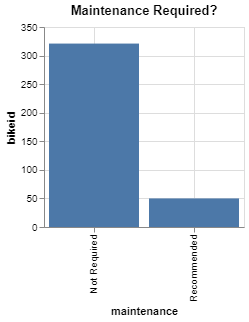

In [39]:
%chart maintenance, bikeid, aggregatey=count, width = 200, title="Maintenance Required?"

<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Looking at the results above, 50 bikes require maintenance according to our assumption that we should do bike repairs after every 70 kms.</p>

<hr style='height:2px;border:none;background-color:#00233C;'>
<b style = 'font-size:28px;font-family:Arial;color:#00233C'>5. Clean up</b>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b>5.1 Work Tables</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>Cleanup work tables to prevent errors next time. This section drops all the tables created during the demonstration.</p>

In [40]:
DROP TABLE weather_temporal;

Success: 32 rows affected

In [41]:
DROP TABLE trips_geo_pti;

Success: 30 rows affected

In [42]:
DROP TABLE trips_and_weather;

Success: 44 rows affected

In [43]:
DROP VIEW trips_geo;

Success: 21 rows affected

<hr style='height:1px;border:none;background-color:#00233C;'>
<p style = 'font-size:18px;font-family:Arial;color:#00233C'><b> 5.2 Databases and Tables</b></p>
<p style = 'font-size:16px;font-family:Arial;color:#00233C'>The following code will clean up tables and databases created above.</p>

In [44]:
call remove_data('DEMO_AustinBikeShare')

Success: 0 rows affected

,Message
1,Removed objects related to DEMO_AustinBikeShare. That ran for 0:00:03.44


<p style = 'font-size:16px;font-family:Arial;color:#00233C'><b>Links:</b></p>
<ul style='font-size:16px;font-family:Arial;color:#00233C'>
    <li>Information about Geospatial datatype can be found <a href = 'https://docs.teradata.com/search/all?query=geospatial&content-lang=en-US'>here</a></li>
    <li>Information about Temporal datatype can be found <a href = 'https://docs.teradata.com/search/all?query=temporal&content-lang=en-US'>here</a></li>
</ul>

<footer style="padding-bottom:35px; background:#f9f9f9; border-bottom:3px solid #00233C">
    <div style="float:left;margin-top:14px">ClearScape Analytics™</div>
    <div style="float:right;">
        <div style="float:left; margin-top:14px">
            Copyright © Teradata Corporation - 2023. All Rights Reserved
        </div>
    </div>
</footer>